In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [57]:
mushroom=pd.read_csv('mushroom.csv')

In [58]:
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Data Visualization

<Figure size 1008x432 with 0 Axes>

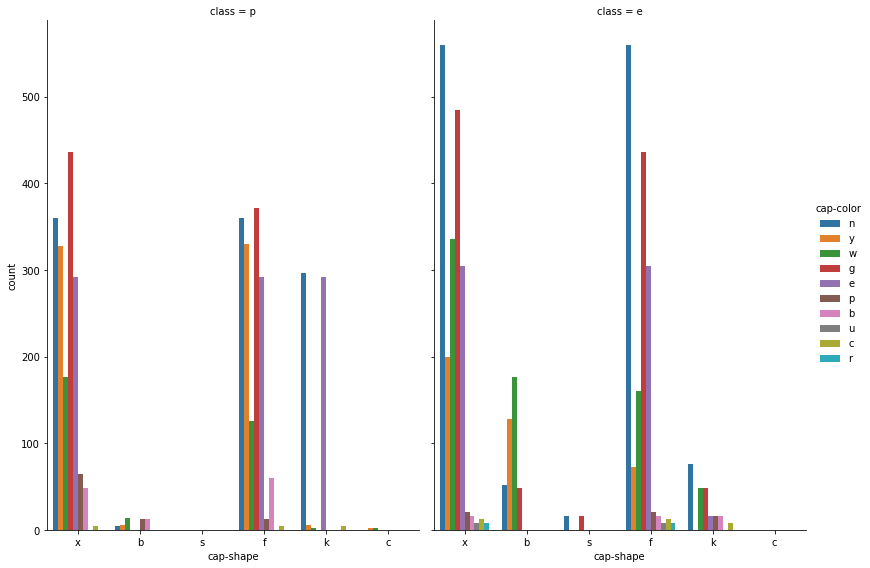

In [59]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="cap-shape",hue="cap-color",col="class",data=mushroom,kind='count',height=8,aspect=.7)

<Figure size 1008x432 with 0 Axes>

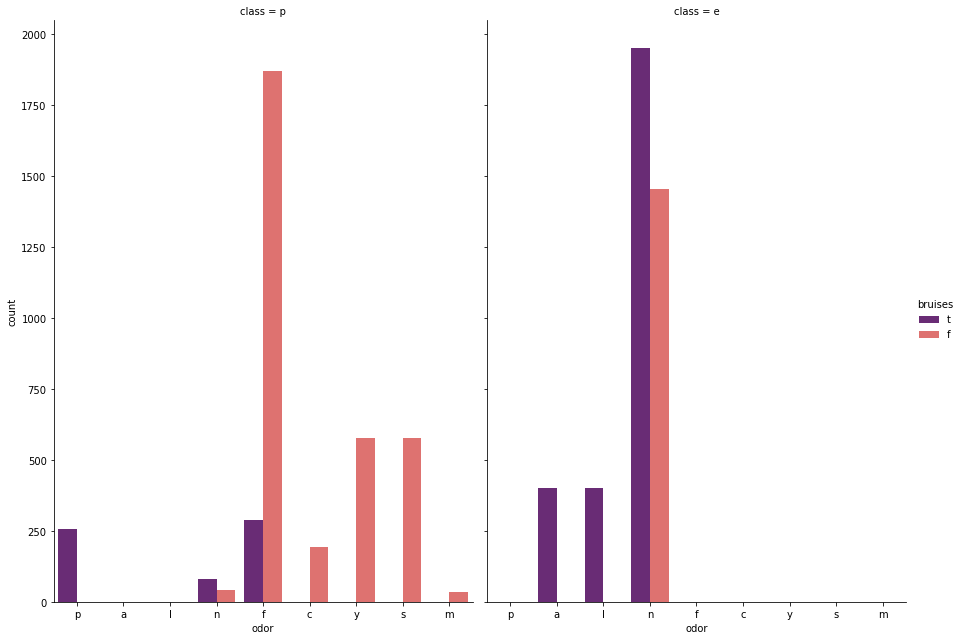

In [60]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="odor",hue="bruises",col="class",data=mushroom,kind='count',palette='magma',height=9,aspect=.7)

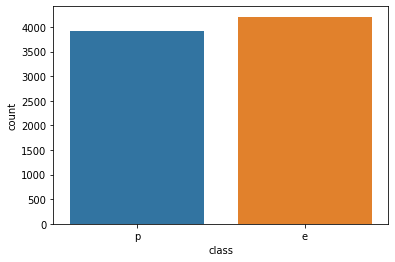

In [61]:
sns.countplot(mushroom['class'])

In [62]:
ds=mushroom

In [63]:
ds.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [64]:
map=list()
encoder=LabelEncoder()
for column in range(len(ds.columns)):
    ds[ds.columns[column]]=encoder.fit_transform(ds[ds.columns[column]])
    map_dict={index: label for index, label in enumerate (encoder.classes_)}
    map.append(map_dict)

In [65]:
map

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [66]:
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


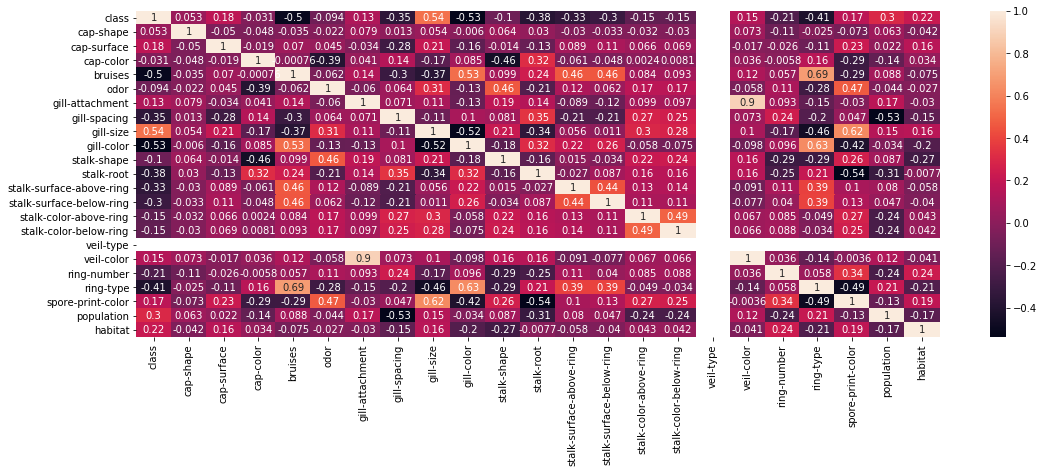

In [67]:
plt.figure(figsize=(18,6))
sns.heatmap(ds.corr(),annot=True)

In [68]:
y_mushroom=ds['class']
x_mushroom=ds.drop('class',axis=1)

In [69]:
scaler=StandardScaler()
x_mushroom=pd.DataFrame(scaler.fit_transform(x_mushroom),columns=x_mushroom.columns)

In [70]:
x_mushroom

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [71]:
ds.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
#model selection for prediction

In [75]:
lg=LogisticRegression()

In [76]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_mushroom,y_mushroom,test_size=0.20,random_state=i)
    lg.fit(x_train,y_train)
    predlr=lg.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print("Best accuracy is ",maxr2," on Random_state ",maxRS)

Best accuracy is  0.9729230769230769  on Random_state  21


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_mushroom,y_mushroom,test_size=.22,random_state=21)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6336, 22)
(1788, 22)
(6336,)
(1788,)


In [78]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred))


0.9720357941834452


In [79]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))


1.0


In [84]:
score=cross_val_score(rf,x_mushroom,y_mushroom,cv=5)
print(score)
print(score.mean())

[0.84246154 1.         1.         1.         0.57019704]
0.8825317165593027


In [85]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))


1.0


In [86]:
score=cross_val_score(rf,x_mushroom,y_mushroom,cv=5)
print(score)
print(score.mean())

[0.84246154 1.         1.         1.         0.60775862]
0.8900440318302387


In [87]:
score=cross_val_score(lg,x_mushroom,y_mushroom,cv=5)
print(score)
print(score.mean())

[0.67876923 0.98215385 0.87569231 0.99815385 0.61576355]
0.8301065555134521


In [89]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print(accuracy_score(y_test,predg))



0.9267337807606264


In [90]:
score=cross_val_score(gnb,x_mushroom,y_mushroom,cv=5)
print(score)
print(score.mean())

[0.72923077 0.96123077 0.79261538 0.65230769 0.49445813]
0.7259685486926866


In [91]:
sv=SVC()
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print(accuracy_score(y_test,preds))


1.0


In [92]:
score=cross_val_score(sv,x_mushroom,y_mushroom,cv=5)
print(score)
print(score.mean())

[0.84246154 1.         0.96       1.         0.54864532]
0.8702213717317167


In [93]:
#Here the best model is Decision Tree Classifier as the its accuracy score and cross val score is maximun and their difference is minimum

In [101]:
parameters = {'criterion':['gini','entropy'],'random_state':range(1,200)}
clf = GridSearchCV(dtc, parameters,scoring='accuracy',cv=5)
clf.fit(x_mushroom,y_mushroom)
best_param=clf.best_params_
print(best_param)
best_result=clf.best_score_
print(best_result)

{'criterion': 'gini', 'random_state': 99}
0.9739016294050776


In [106]:
dtc=DecisionTreeClassifier('gini',random_state=99)
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))

1.0


In [107]:
print(dtc_pred)

[0 0 1 ... 0 0 1]


In [108]:
import joblib
joblib.dump(dtc,'mushroomfile.obj') #dumping the best model

['mushroomfile.obj']

In [115]:
mod=joblib.load('mushroomfile.obj') #loading the model
predicted_values=mod.predict(x_test) #prediction
print(predicted_values)

[0 0 1 ... 0 0 1]
